In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [13]:
# we want to use an exponential moving average to analyze 10 CAC40 
# companies to find out whether to buy or sell.
# First we retrieve the 'url' wikipedia which contains the dataframes with the companies names and tickers
url = 'https://fr.wikipedia.org/wiki/CAC_40'
datasets = pd.read_html(url)
nombre_de_datasets = len(datasets)

# We notice that the third table of the page [2] contains such information so we isolate this table
df = datasets[2]

# We keep the columns of interest, that is the companies name and the tickers which are located
# in the first and second column
df = df.iloc[:, :2]

# Then we set the index as the name of the companies
df = df.set_index(df.columns[0])

# Ultimatly we rename the second column as 'tickers' beacause it contains the tickers
df = df.rename(columns={'Mnémo' : 'tickers'})

# check the result
df

tickers
Société                          
Accor                          AC
Air liquide                    AI
Airbus                        AIR
ArcelorMittal                  MT
Axa                            CS
BNP Paribas                   BNP
Bouygues                       EN
Capgemini                     CAP
Carrefour                      CA
Crédit agricole               ACA
Danone                         BN
Dassault Systèmes             DSY
Edenred                      EDEN
Engie                        ENGI
EssilorLuxottica               EL
Eurofins Scientific           ERF
Hermès International          RMS
Kering                        KER
Legrand                        LR
L'Oréal                        OR
LVMH                           MC
Michelin                       ML
Orange                        ORA
Pernod Ricard                  RI
Publicis Groupe               PUB
Renault                       RNO
Safran                        SAF
Saint-Gobain                  SGO
Sanofi                        SAN
Schneider Electric             SU
Société générale              GLE
Stellantis                  STLAP
STMicroelectronics          STMPA
Teleperformance               TEP
Thales                         HO
TotalEnergies                 TTE
Unibail-Rodamco-Westfield     URW
Veolia                        VIE
Vinci                          DG
Vivendi                       VIV

In [14]:
# We select randomly 10 compagnies of interest to compute our exponential mobile averages
df_sample = df.sample(n=20)
df_sample

tickers
Société                    
Capgemini               CAP
Michelin                 ML
Vivendi                 VIV
Veolia                  VIE
Vinci                    DG
Sanofi                  SAN
STMicroelectronics    STMPA
Renault                 RNO
Teleperformance         TEP
Eurofins Scientific     ERF
Airbus                  AIR
Bouygues                 EN
Safran                  SAF
Stellantis            STLAP
Kering                  KER
Thales                   HO
Crédit agricole         ACA
EssilorLuxottica         EL
Axa                      CS
L'Oréal                  OR

In [4]:
tickers = df_sample['tickers'].to_list()
tickers

['URW',
 'EDEN',
 'RNO',
 'ORA',
 'VIE',
 'STMPA',
 'SU',
 'MT',
 'DG',
 'SAF',
 'GLE',
 'PUB',
 'ENGI',
 'AC',
 'ML',
 'SGO',
 'STLAP',
 'AI',
 'HO',
 'LR']

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['URW']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

$URW: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)
$RNO: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)




1 Failed download:
['RNO']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['VIE']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STMPA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SAF']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)')
[*********************100%%**********************]  

$SAF: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)
$GLE: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['PUB']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ENGI']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SGO']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)')


$SGO: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STLAP']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['HO']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LR']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)')


$HO: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)
$LR: possibly delisted; No price data found  (1d 2023-01-01 -> 2024-08-06)


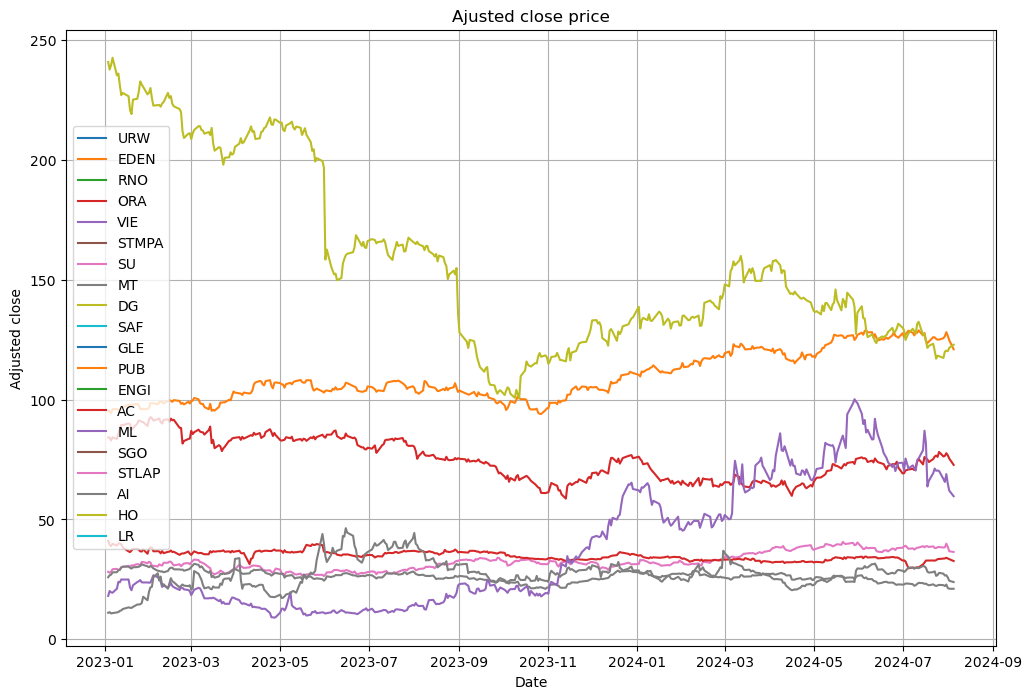

In [5]:
# Plot every stock on one graph

current_date = datetime.now().strftime('%Y-%m-%d')

data = {}

for ticker in tickers:
    df = yf.download(ticker, start="2023-01-01", end=current_date)
    data[ticker] = df

plt.figure(figsize=(12,8))

for ticker, df in data.items():
    if 'Adj Close' in df.columns:
        plt.plot(df.index, df['Adj Close'], label=ticker)
    else:
        print(f"Colonne 'Adj Close' does not exist for {ticker}")

plt.xlabel('Date')
plt.ylabel('Adjusted close')
plt.title('Ajusted close price')
plt.legend()
plt.grid(True)

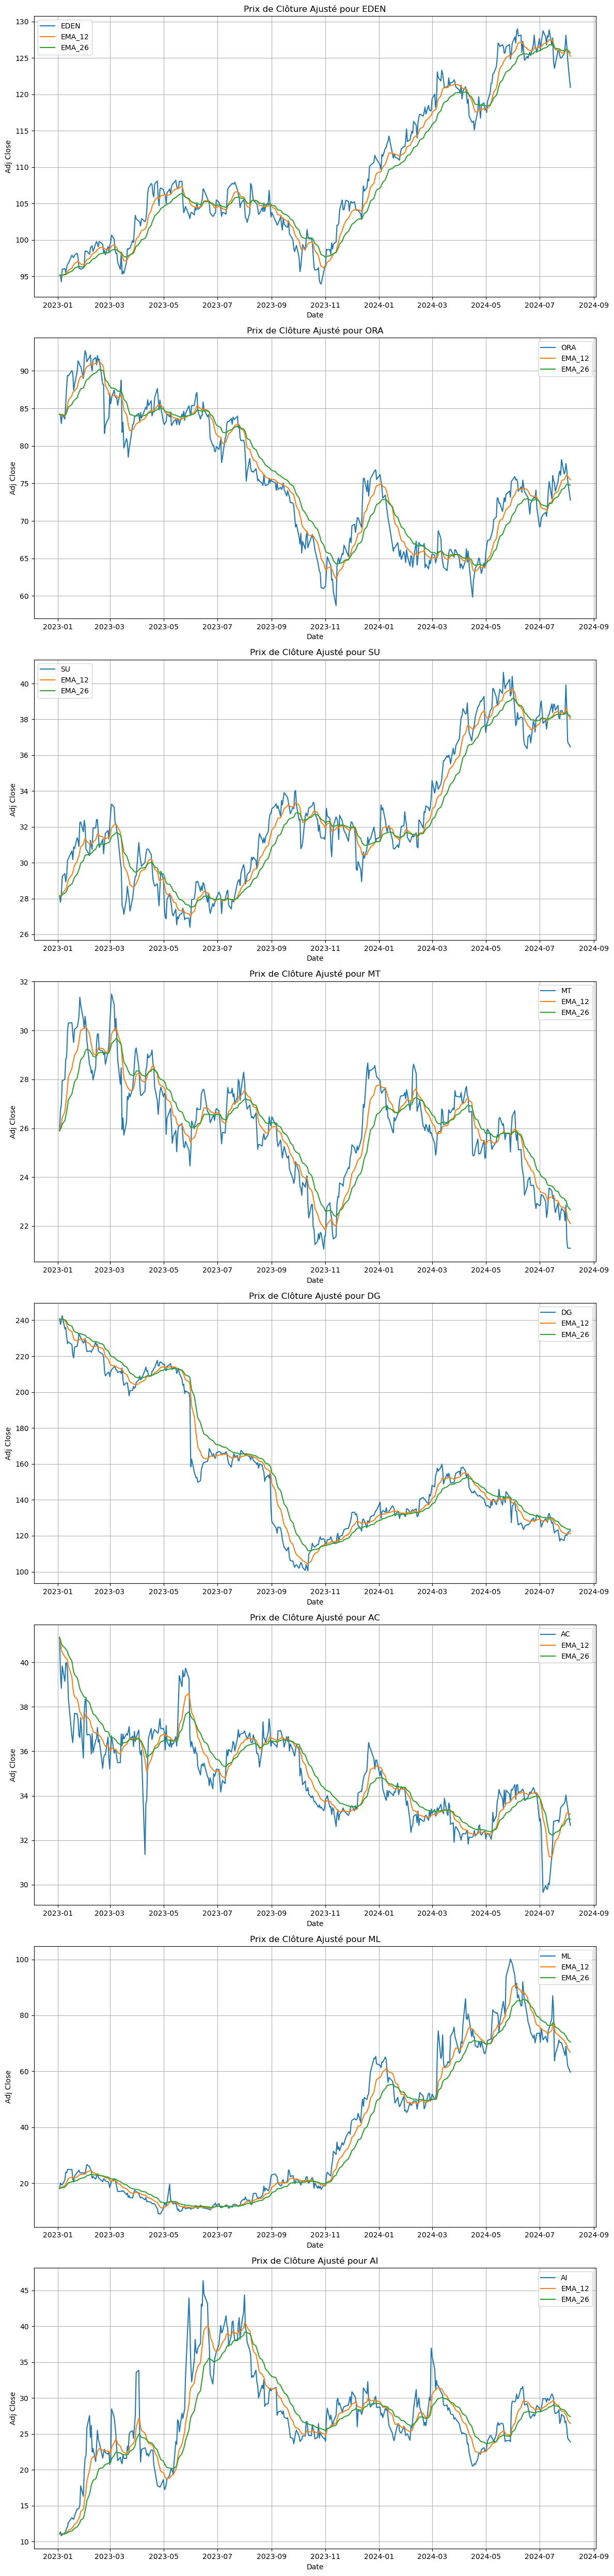

In [6]:
# Create one graph for one particular stock (easier to read)

# Let's first filtering data because some data are not available for some tickers
filtered_data = {}
for ticker, df in data.items():
    if 'Adj Close' in df.columns:
        if not df['Adj Close'].isna().all():  # Check if Adj CLose contains data and not NaN
            filtered_data[ticker] = df # if it contains data we add it to our dictionary

num_tickers = len(filtered_data)

# Create the bases of the plots with an axis objects named 'ax' et a figure object named 'fig'
fig, axes = plt.subplots(nrows=num_tickers, ncols=1, figsize=(12, 50)) #(width, height)



# Tracer les données pour chaque ticker filtré
for ax, (ticker, df) in zip(axes, filtered_data.items()):
    
    # Calculate exponential mobile average 12 and 26
    df['EMA_12'] = df['Adj Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Adj Close'].ewm(span=26, adjust=False).mean()
   

# check if crossing and the direction of the cross (up or down)
    crossings = df[(df['EMA_12'] > df['EMA_26']) & 
                  (df['EMA_12'].shift(1) < df['EMA_26'].shift(1)) | 
                  (df['EMA_12'] < df['EMA_26']) & 
                  (df['EMA_12'].shift(1) > df['EMA_26'].shift(1))]
    
    
    ax.plot(df.index, df['Adj Close'], label=ticker)
    ax.plot(df.index, df['EMA_12'], label='EMA_12')
    ax.plot(df.index, df['EMA_26'], label='EMA_26')
    
    ax.set_title(f'Prix de Clôture Ajusté pour {ticker}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adj Close')
    ax.grid(True)
    ax.legend()


# Adjust spacing to avoid overlapping
plt.tight_layout()

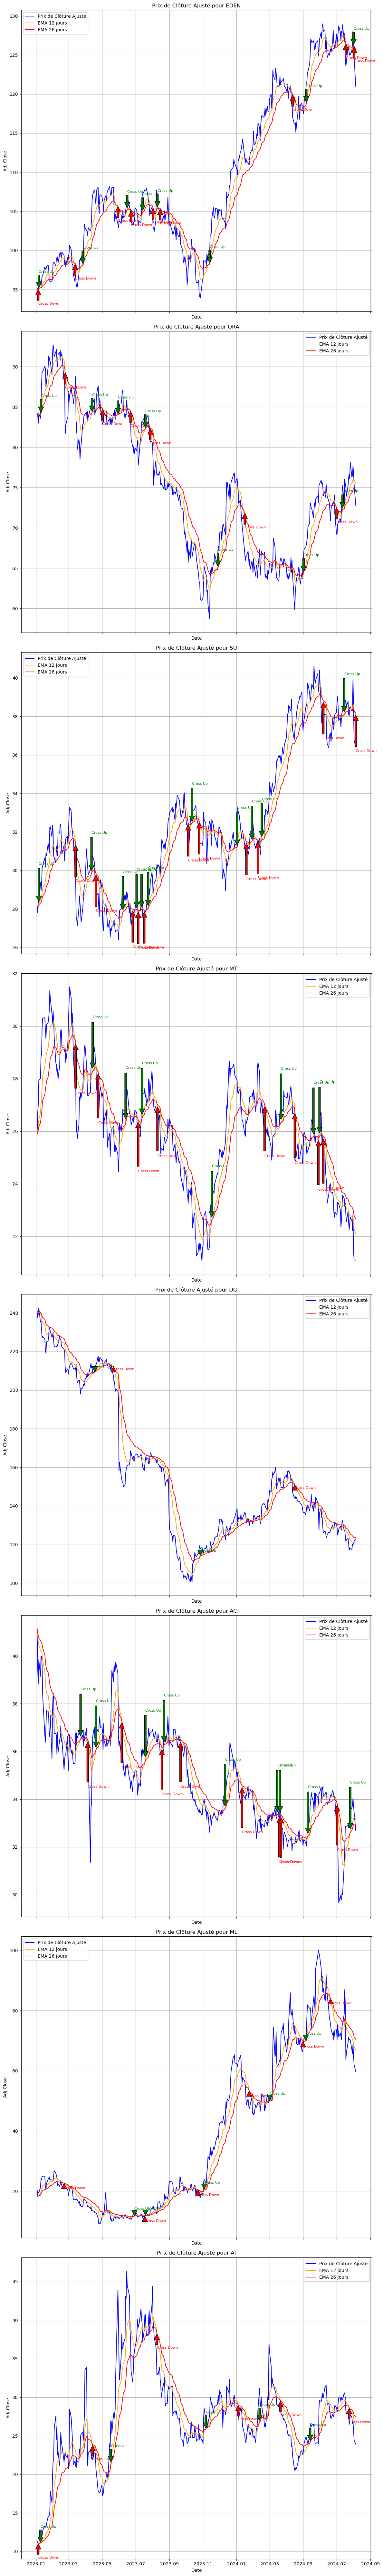

In [7]:
# Let's first filtering data because some data are not available for some tickers
filtered_data = {}
for ticker, df in data.items():
    if 'Adj Close' in df.columns:
        if not df['Adj Close'].isna().all():  # Check if Adj CLose contains data and not NaN
            filtered_data[ticker] = df # if it contains data we add it to our dictionary

# Nombre de tickers après filtrage
num_tickers = len(filtered_data)

# Créer une figure avec une grille de sous-graphes
fig, axes = plt.subplots(nrows=num_tickers, ncols=1, figsize=(12, 80), sharex=True)

# Tracer les données pour chaque ticker filtré
for ax, (ticker, df) in zip(axes, filtered_data.items()):
    # Calcul des moyennes mobiles exponentielles (MME) à 12 et 26 jours
    df['EMA_12'] = df['Adj Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Adj Close'].ewm(span=26, adjust=False).mean()
   
    # Identifier les croisements
    crossings = df[
        ((df['EMA_12'] > df['EMA_26']) & (df['EMA_12'].shift(1) < df['EMA_26'].shift(1))) |
        ((df['EMA_12'] < df['EMA_26']) & (df['EMA_12'].shift(1) > df['EMA_26'].shift(1)))
    ]
    
    # Tracer les prix de clôture ajustés et les MME
    ax.plot(df.index, df['Adj Close'], label='Prix de Clôture Ajusté', color='blue')
    ax.plot(df.index, df['EMA_12'], label='EMA 12 jours', color='orange')
    ax.plot(df.index, df['EMA_26'], label='EMA 26 jours', color='red')
    
    # Annoter les croisements
    for date, row in crossings.iterrows():
        if row['EMA_12'] > row['EMA_26']:
            ax.annotate(
                'Cross Up',
                xy=(date, row['EMA_12']),
                xytext=(date, row['EMA_12'] + 2),
                arrowprops=dict(facecolor='green', shrink=0.05),
                fontsize=8,
                color='green'
            )
        else:
            ax.annotate(
                'Cross Down',
                xy=(date, row['EMA_26']),
                xytext=(date, row['EMA_26'] - 2),
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=8,
                color='red'
            )

    # Ajouter des titres et des labels
    ax.set_title(f'Prix de Clôture Ajusté pour {ticker}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adj Close')
    ax.grid(True)
    ax.legend()

# Ajuster les espacements pour éviter les chevauchements
plt.tight_layout()

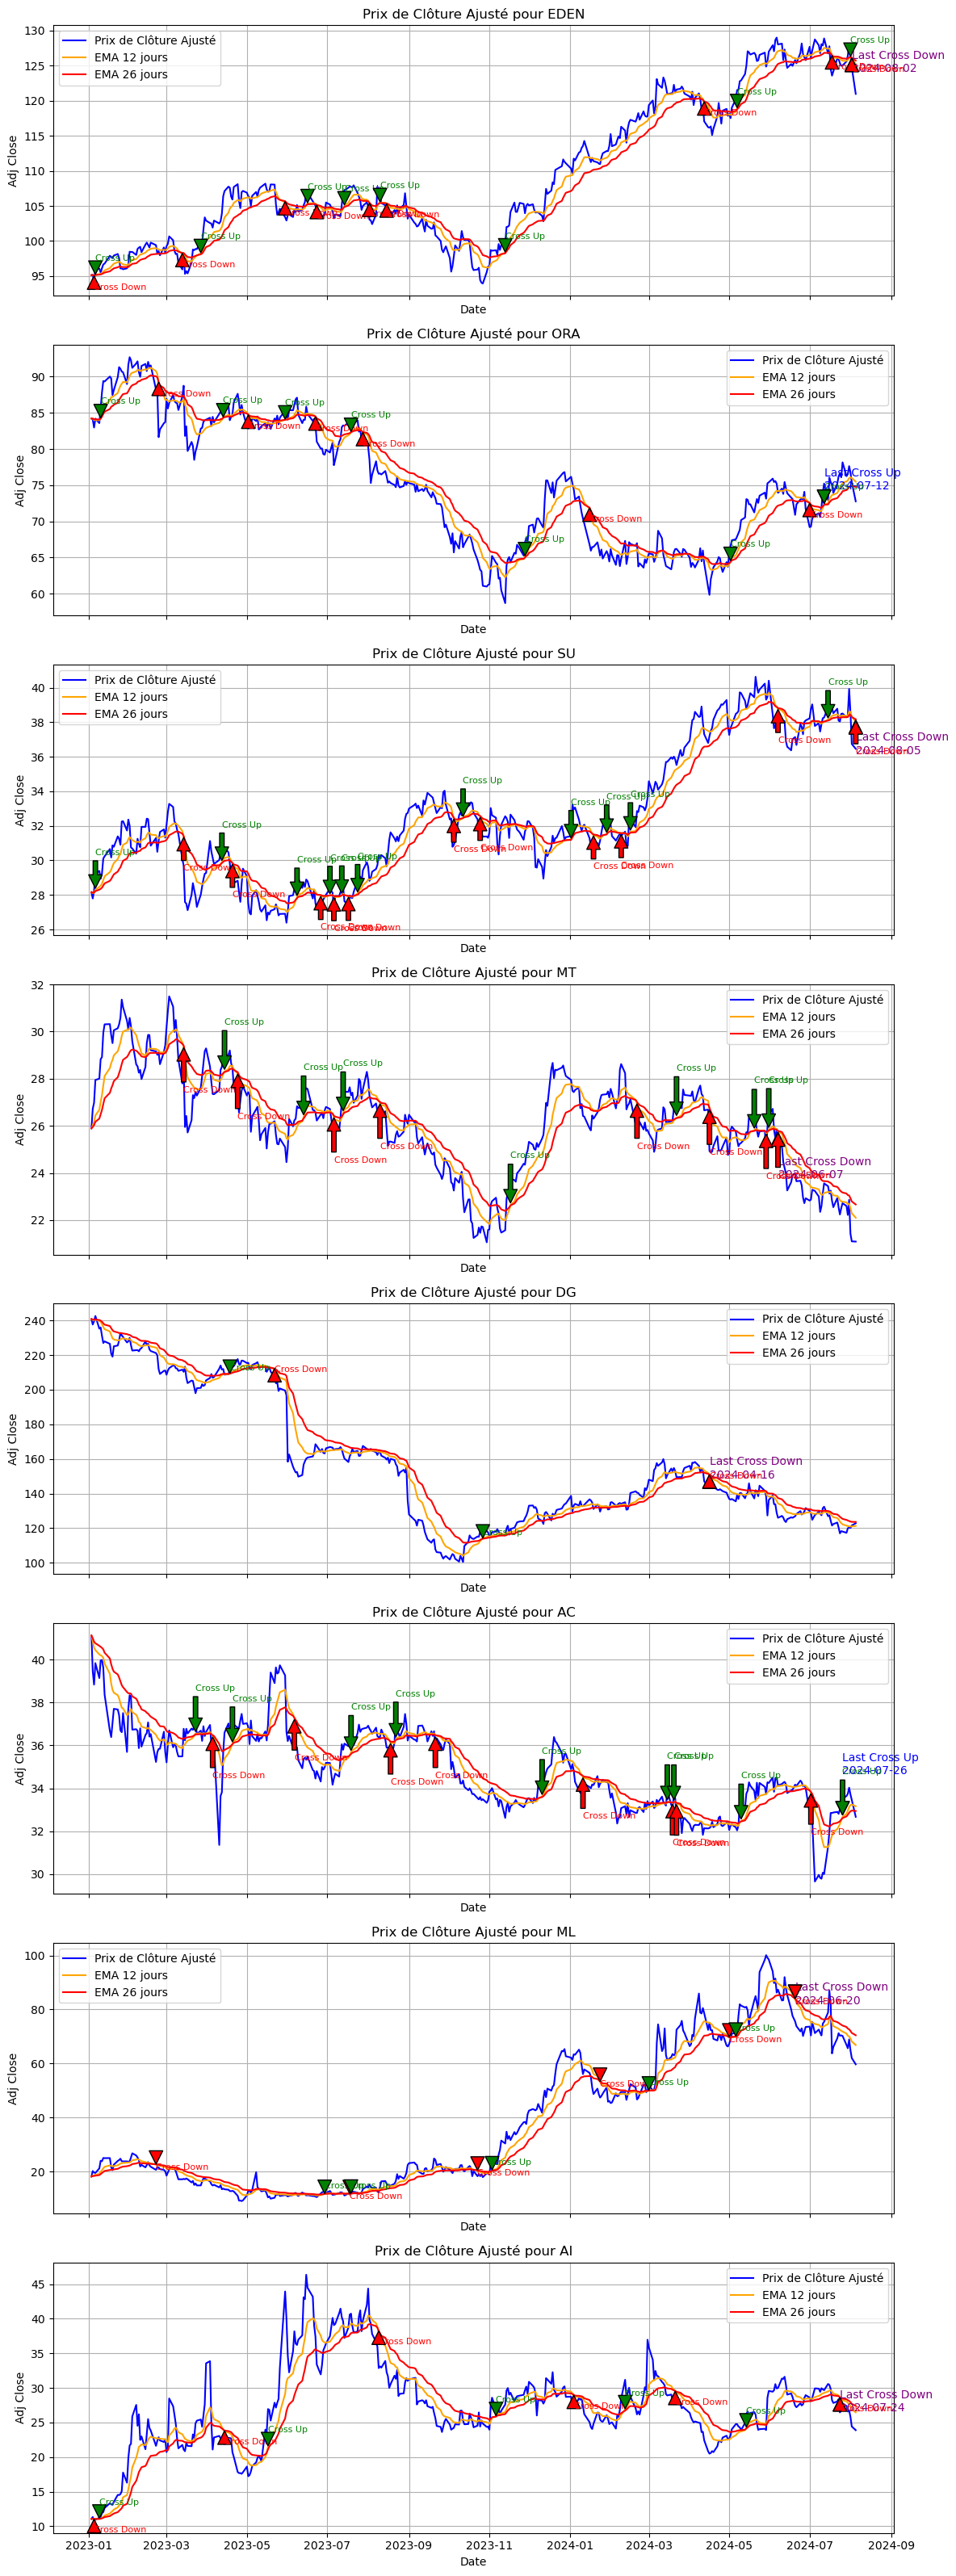

In [8]:
# Créer une figure avec une grille de sous-graphes
fig, axes = plt.subplots(nrows=num_tickers, ncols=1, figsize=(12, 4 * num_tickers), sharex=True)

# Tracer les données pour chaque ticker filtré
for ax, (ticker, df) in zip(axes, filtered_data.items()):
    # Calcul des moyennes mobiles exponentielles (MME) à 12 et 26 jours
    df['EMA_12'] = df['Adj Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Adj Close'].ewm(span=26, adjust=False).mean()
   
    # Identifier les croisements
    crossings = df[
        ((df['EMA_12'] > df['EMA_26']) & (df['EMA_12'].shift(1) < df['EMA_26'].shift(1))) |
        ((df['EMA_12'] < df['EMA_26']) & (df['EMA_12'].shift(1) > df['EMA_26'].shift(1)))
    ]
    
    # Trouver le dernier croisement
    if not crossings.empty:
        last_cross_date = crossings.index[-1]
        last_cross_row = crossings.loc[last_cross_date]
        
        # Annoter le dernier croisement
        if last_cross_row['EMA_12'] > last_cross_row['EMA_26']:
            ax.annotate(
                f'Last Cross Up\n{last_cross_date.date()}',
                xy=(last_cross_date, last_cross_row['EMA_12']),
                xytext=(last_cross_date, last_cross_row['EMA_12'] + 2),
                arrowprops=dict(facecolor='blue', shrink=0.05),
                fontsize=10,
                color='blue'
            )
        else:
            ax.annotate(
                f'Last Cross Down\n{last_cross_date.date()}',
                xy=(last_cross_date, last_cross_row['EMA_26']),
                xytext=(last_cross_date, last_cross_row['EMA_26'] - 2),
                arrowprops=dict(facecolor='purple', shrink=0.05),
                fontsize=10,
                color='purple'
            )
    
    # Tracer les prix de clôture ajustés et les MME
    ax.plot(df.index, df['Adj Close'], label='Prix de Clôture Ajusté', color='blue')
    ax.plot(df.index, df['EMA_12'], label='EMA 12 jours', color='orange')
    ax.plot(df.index, df['EMA_26'], label='EMA 26 jours', color='red')
    
    # Annoter tous les croisements
    for date, row in crossings.iterrows():
        if row['EMA_12'] > row['EMA_26']:
            ax.annotate(
                'Cross Up',
                xy=(date, row['EMA_12']),
                xytext=(date, row['EMA_12'] + 2),
                arrowprops=dict(facecolor='green', shrink=0.05),
                fontsize=8,
                color='green'
            )
        else:
            ax.annotate(
                'Cross Down',
                xy=(date, row['EMA_26']),
                xytext=(date, row['EMA_26'] - 2),
                arrowprops=dict(facecolor='red', shrink=0.05),
                fontsize=8,
                color='red'
            )

    # Ajouter des titres et des labels
    ax.set_title(f'Prix de Clôture Ajusté pour {ticker}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Adj Close')
    ax.grid(True)
    ax.legend()

# Ajuster les espacements pour éviter les chevauchements
plt.tight_layout()

The Relative Strength Index (RSI) is a momentum oscillator used in technical analysis to measure the speed and change of price movements. It helps identify overbought or oversold conditions of an asset. Here is a detailed explanation of the mathematical calculations for the RSI:

### RSI Calculation

#### Calculation of Average Gains and Losses

The RSI is typically calculated over a 14-day period. You start by calculating the average gains and losses over this period.

- **Gains**: For each day of the period, if the closing price is higher than the previous day, the difference is considered a gain. Otherwise, the gain is 0.
- **Losses**: If the closing price is lower than the previous day, the difference is considered a loss. Otherwise, the loss is 0.

Formulas for average gains and losses:

- **Average Gain**:
  $$
  \text{Average Gain} = \frac{\text{Sum of Gains over 14 days}}{14}
  $$

- **Average Loss**:
  $$
  \text{Average Loss} = \frac{\text{Sum of Losses over 14 days}}{14}
  $$

#### Calculation of Exponential Averages

After calculating the initial average gains and losses, these values are updated daily using exponential moving averages to smooth the results:

- **Current Average Gain**:
  $$
  \text{Current Average Gain} = \frac{(\text{Previous Average Gain} \times 13) + \text{Current Gain}}{14}
  $$

- **Current Average Loss**:
  $$
  \text{Current Average Loss} = \frac{(\text{Previous Average Loss} \times 13) + \text{Current Loss}}{14}
  $$

This allows more recent data to be weighted more heavily while incorporating the older data.

#### RSI Calculation

The RSI is then calculated using the average gains and losses:

- **Relative Strength (RS)**:
  $$
  \text{RS} = \frac{\text{Average Gain}}{\text{Average Loss}}
  $$

- **RSI**:
  $$
  \text{RSI} = 100 - \frac{100}{1 + \text{RS}}
  $$

### Explanation of the Formulas

- **Average Gain and Average Loss**:
  Gains and losses are calculated for each day of the period. For example, if you are examining a 14-day period, you calculate the daily gains and losses over these 14 days.
  The average of the gains and losses is then calculated for these 14 days. These values are then smoothed using exponential moving averages to reflect current market conditions.

- **Relative Strength (RS)**:
  The RS is the ratio between the average gain and the average loss. It measures the relative strength of the gains compared to the losses.

- **RSI**:
  The RSI is calculated from the RS and is expressed as a percentage, ranging from 0 to 100. An RSI above 70 is often interpreted as an overbought condition (possible reversal or downward correction), while an RSI below 30 is considered an oversold condition (possible reversal or upward correction).


In [11]:
cac40_symbols

['URW',
 'EDEN',
 'RNO',
 'ORA',
 'VIE',
 'STMPA',
 'SU',
 'MT',
 'DG',
 'SAF',
 'GLE',
 'PUB',
 'ENGI',
 'AC',
 'ML',
 'SGO',
 'STLAP',
 'AI',
 'HO',
 'LR']

[*********************100%%**********************]  1 of 1 completed


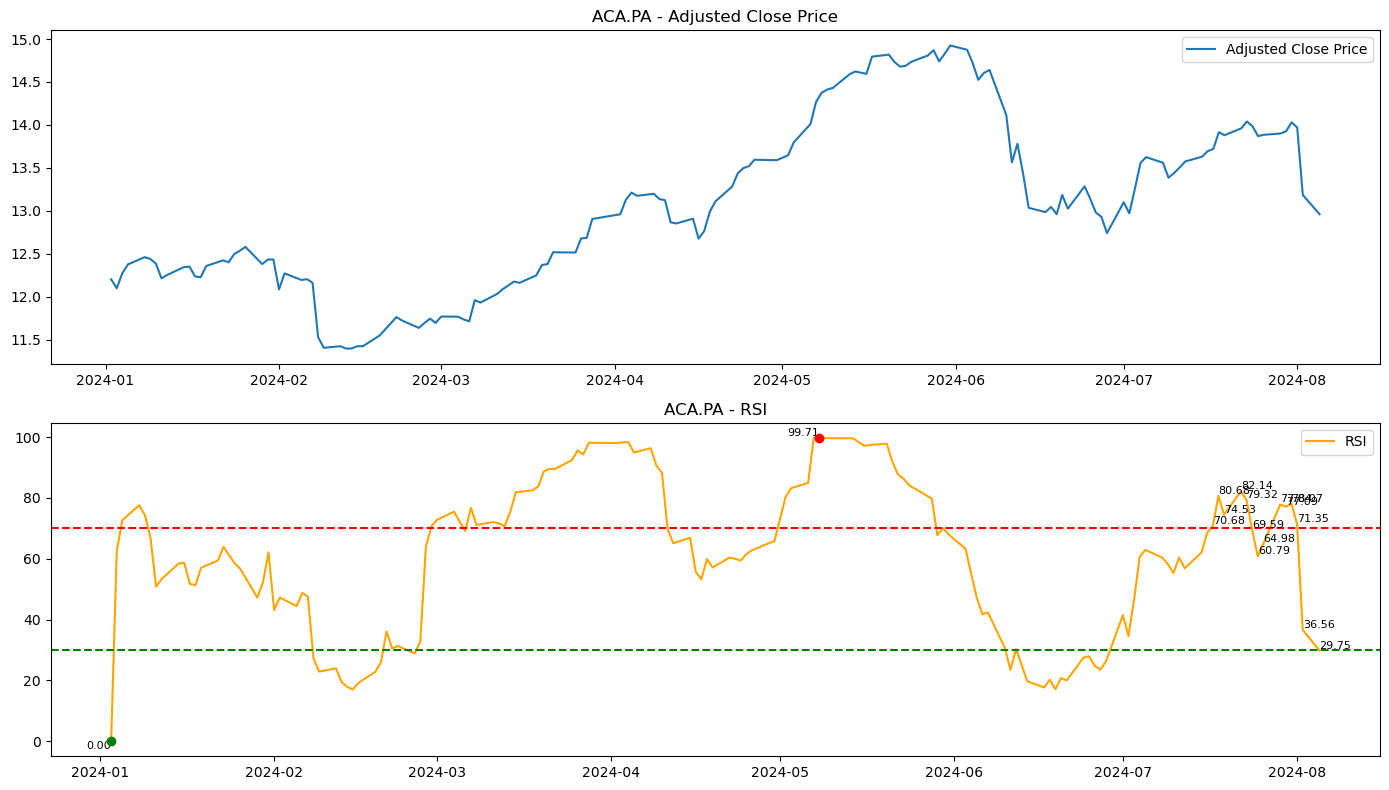

[*********************100%%**********************]  1 of 1 completed


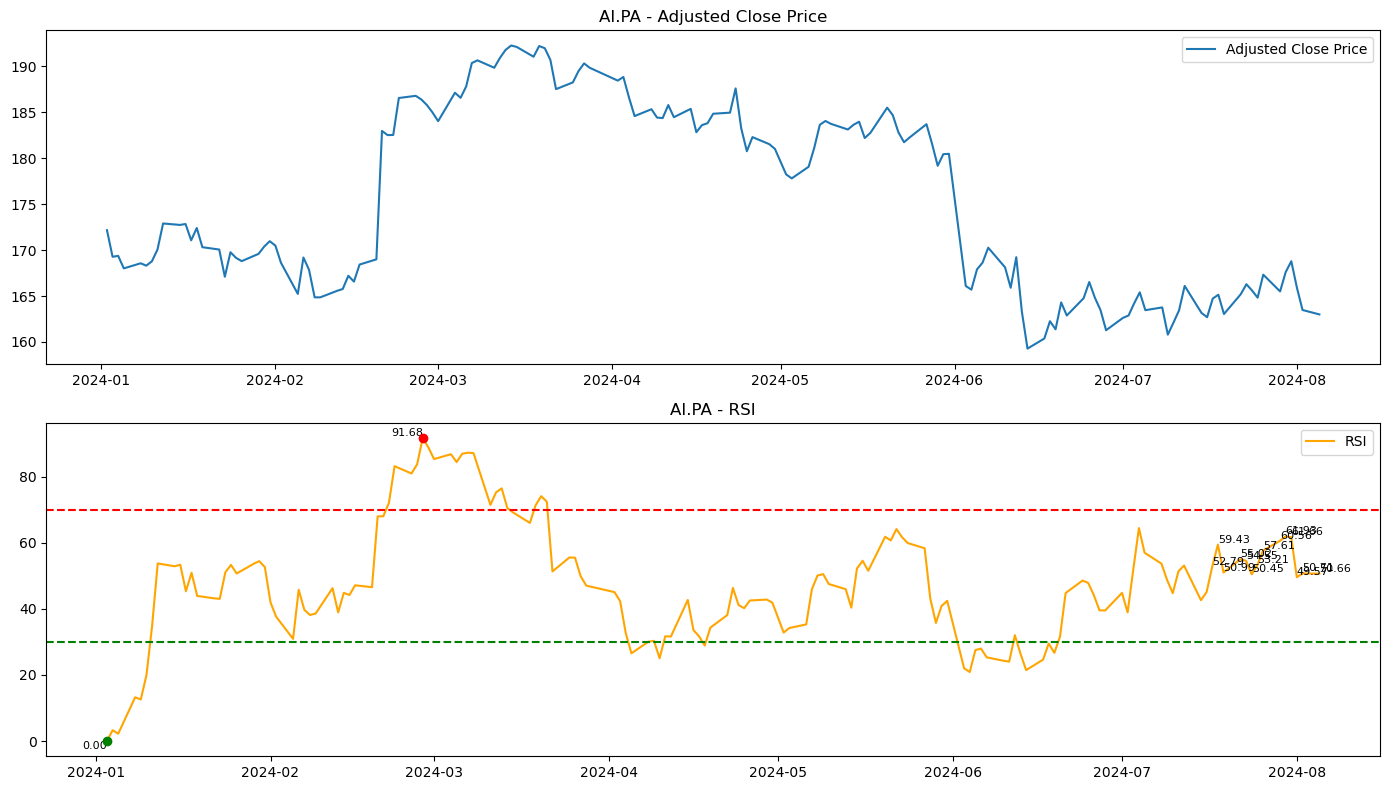

[*********************100%%**********************]  1 of 1 completed


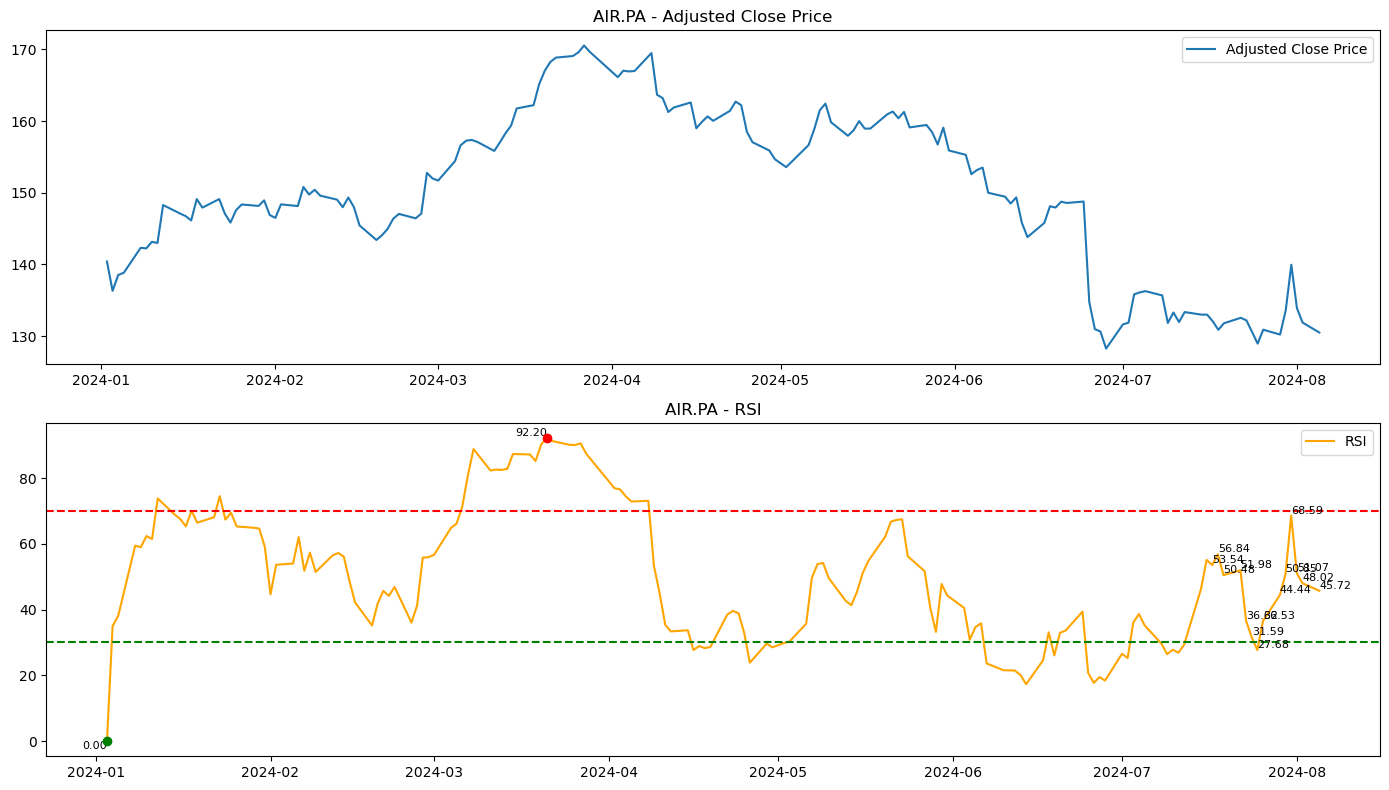

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ALU.PA']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)')
[*********************100%%**********************]  1 of 1 completed

$ALU.PA: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)
No data found for ALU.PA


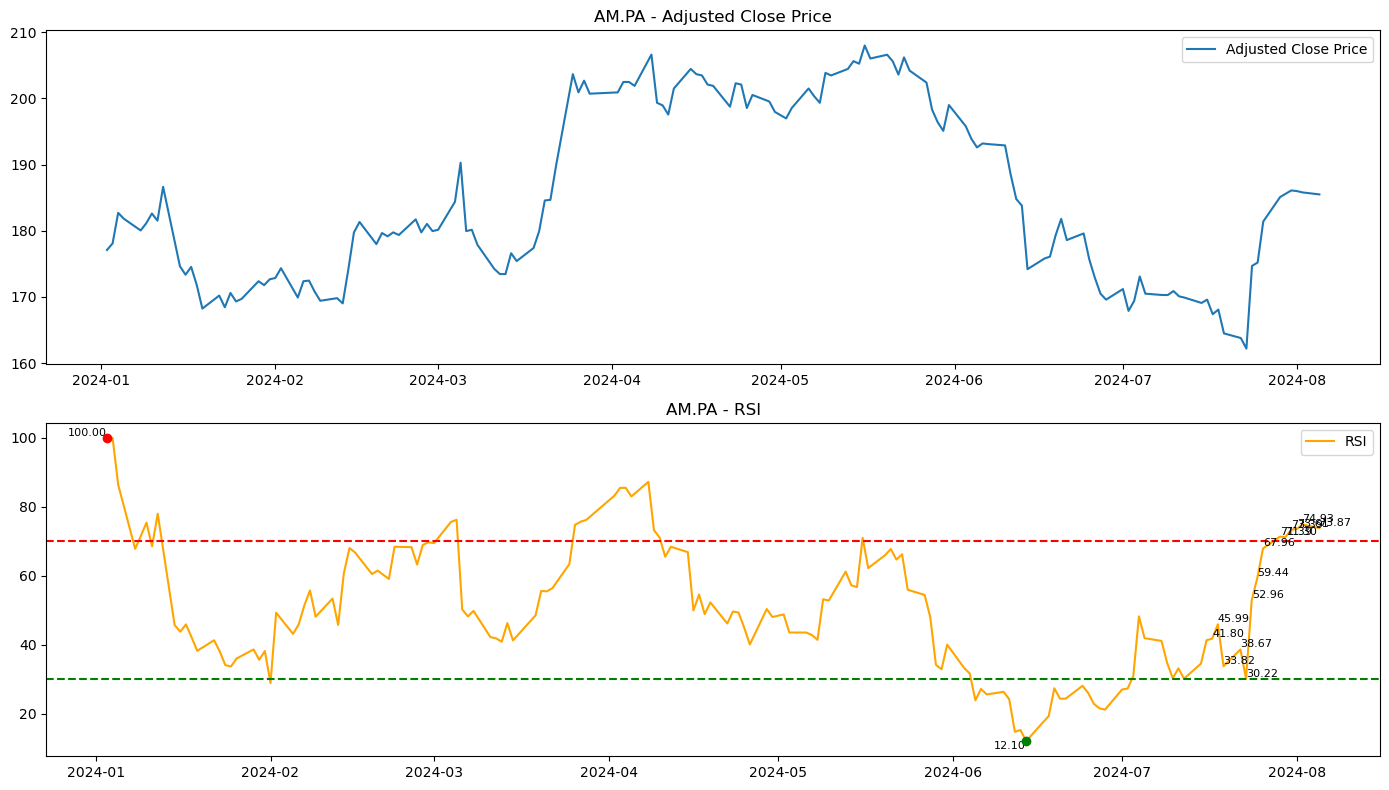

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ARFP.PA']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ATOS.PA']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AUP.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AXA.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

$ARFP.PA: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)
No data found for ARFP.PA
$ATOS.PA: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)
No data found for ATOS.PA
No data found for AUP.PA
No data found for AXA.PA


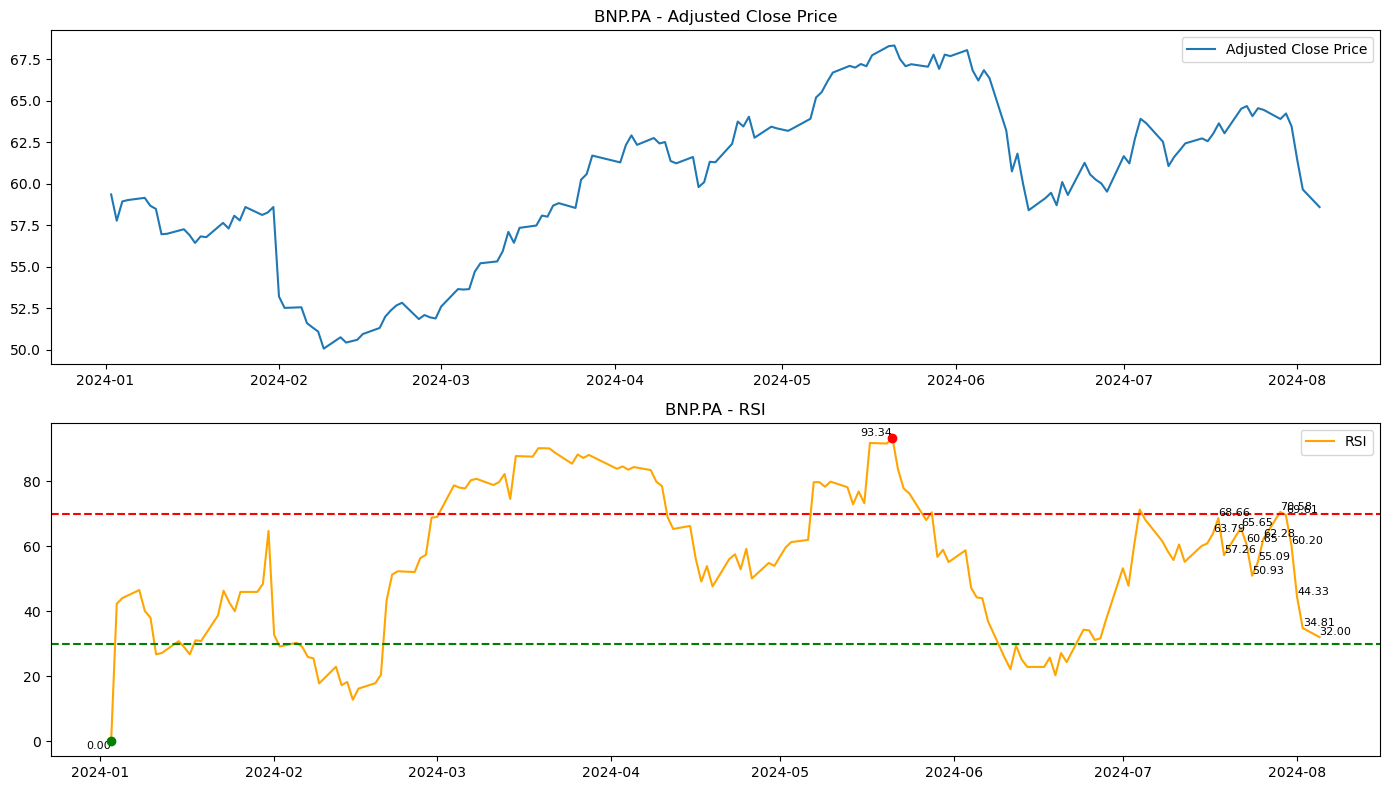

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BOUYG.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed


No data found for BOUYG.PA


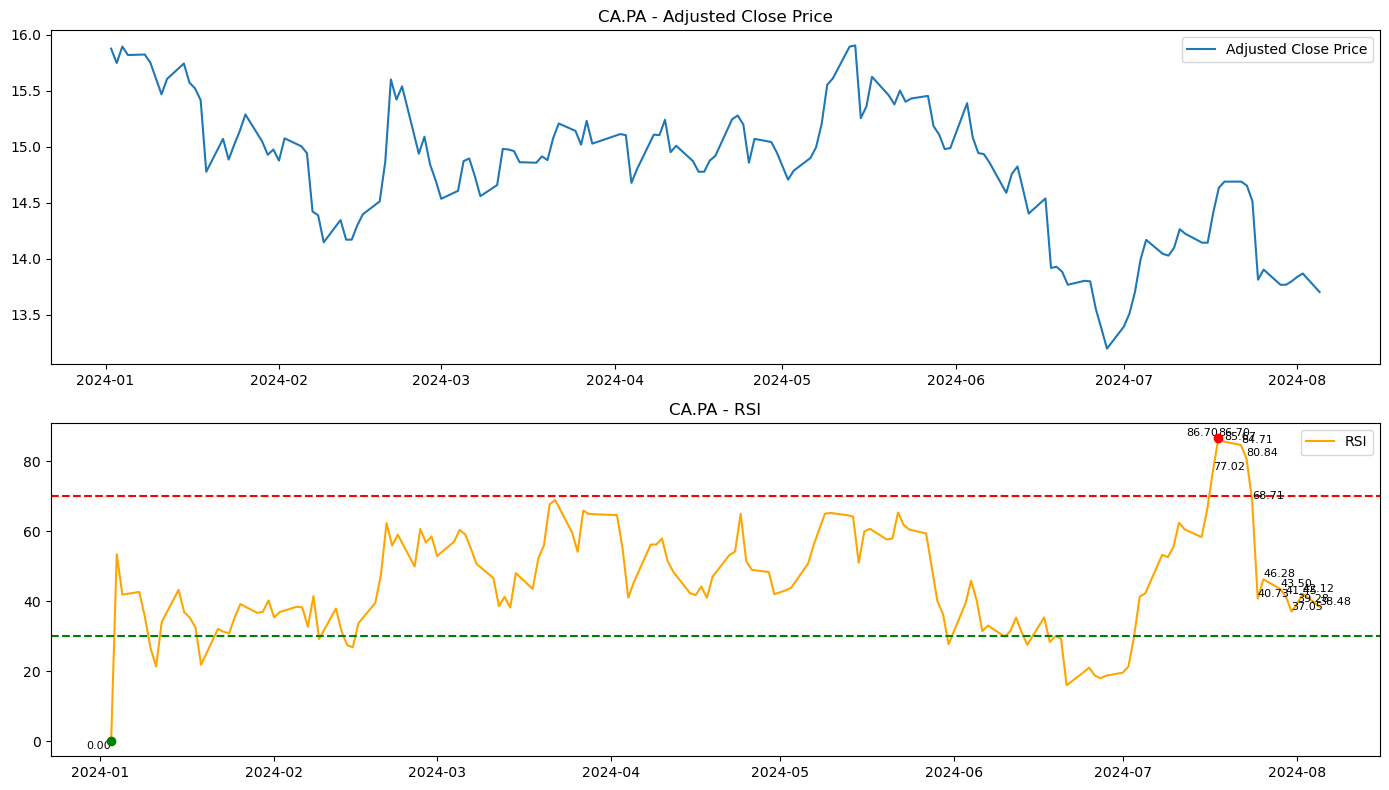

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CAPFP.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CAR.PA']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CB.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CCI.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CRON.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['DAN.PA']: YFPricesMissingError('$%ticker%: 

No data found for CAPFP.PA
No data found for CAR.PA
No data found for CB.PA
No data found for CCI.PA
No data found for CRON.PA
$DAN.PA: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)
No data found for DAN.PA


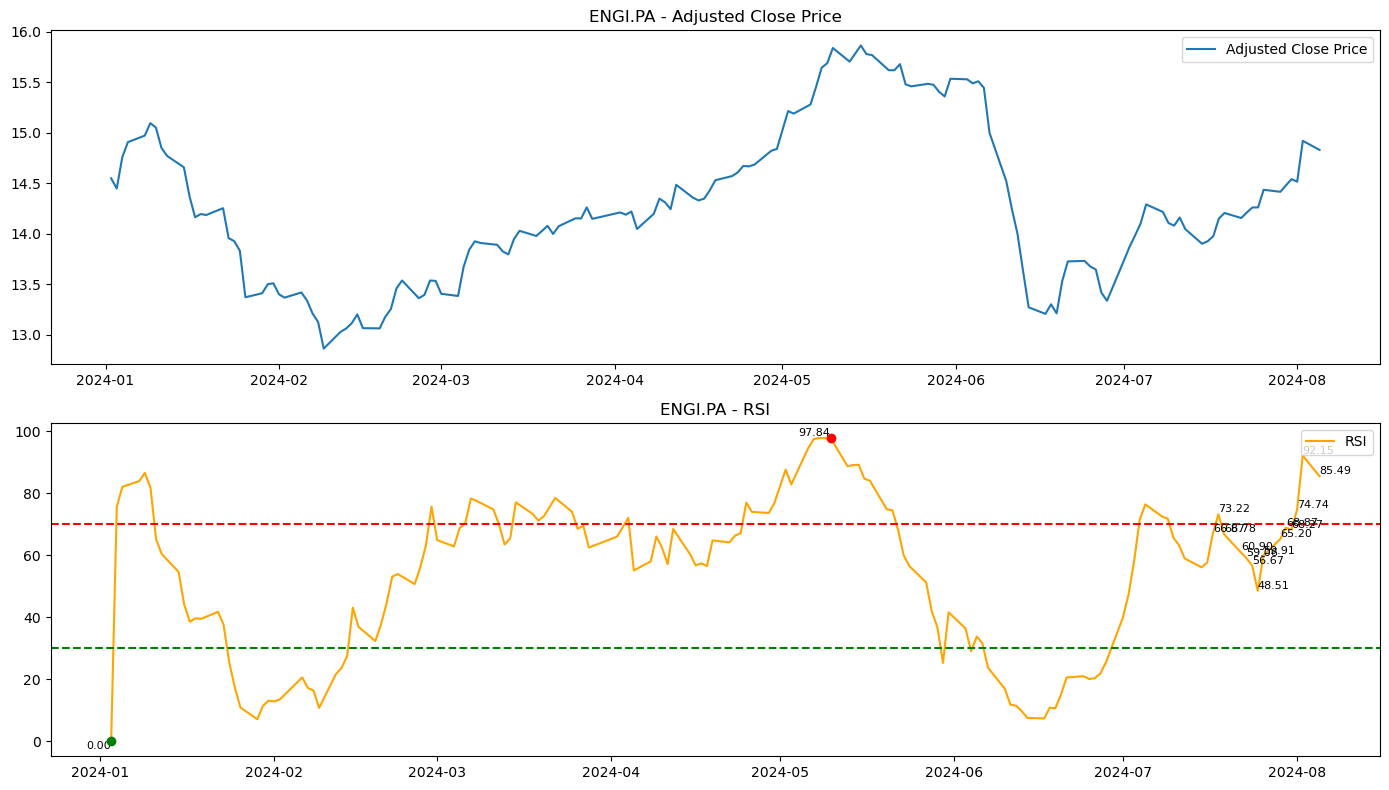

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['ESSI.PA']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['EURO.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['FDR.PA']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)')
[*********************100%%**********************]  1 of 1 completed

$ESSI.PA: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)
No data found for ESSI.PA
No data found for EURO.PA
$FDR.PA: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)
No data found for FDR.PA


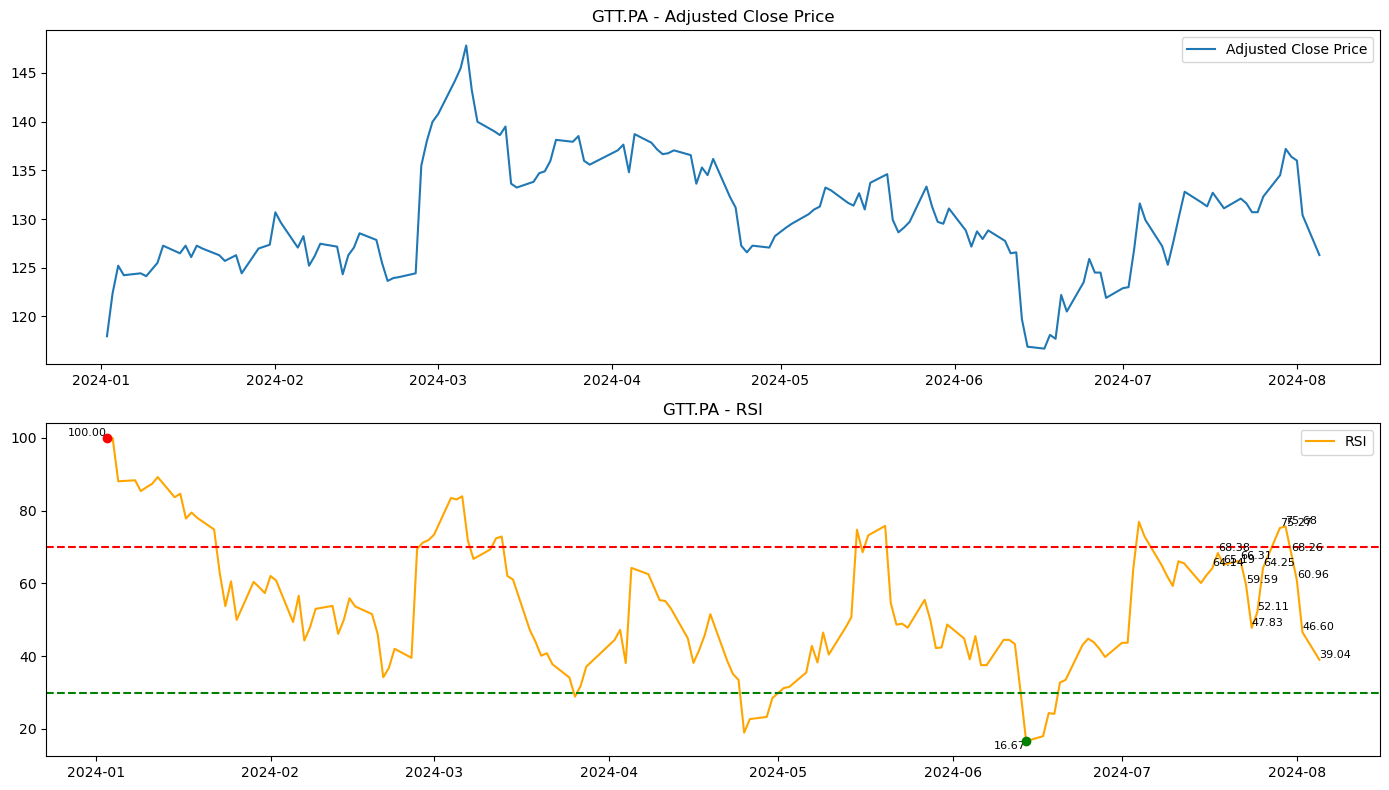

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['KERING.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LHN.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['LVMH.PA']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MMD.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MNK.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['MS.PA']: YFTzMissingErr

No data found for KERING.PA
No data found for LHN.PA
$LVMH.PA: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)
No data found for LVMH.PA
No data found for MMD.PA
No data found for MNK.PA
No data found for MS.PA


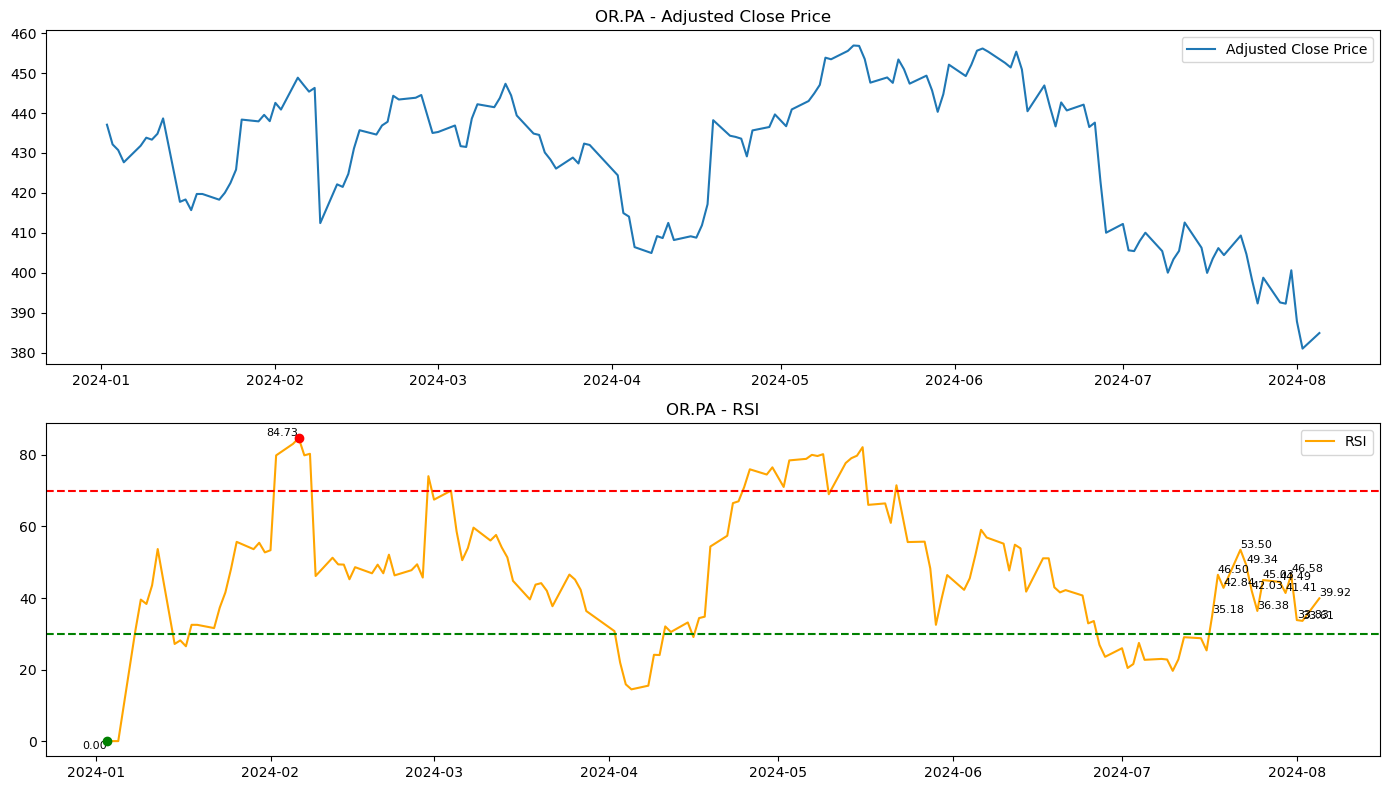

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['POM.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['RENA.PA']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)')
[*********************100%%**********************]  1 of 1 completed


No data found for POM.PA
$RENA.PA: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)
No data found for RENA.PA


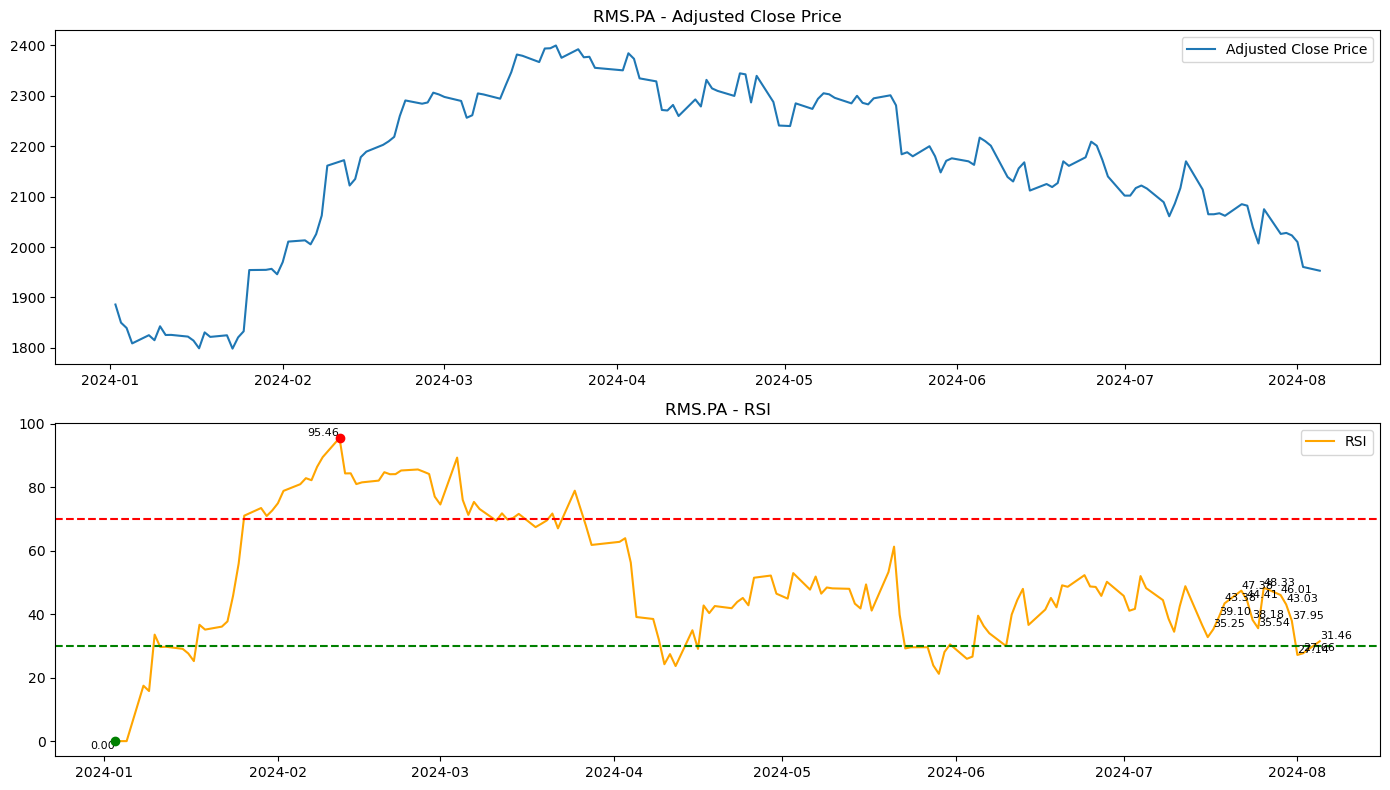

[*********************100%%**********************]  1 of 1 completed


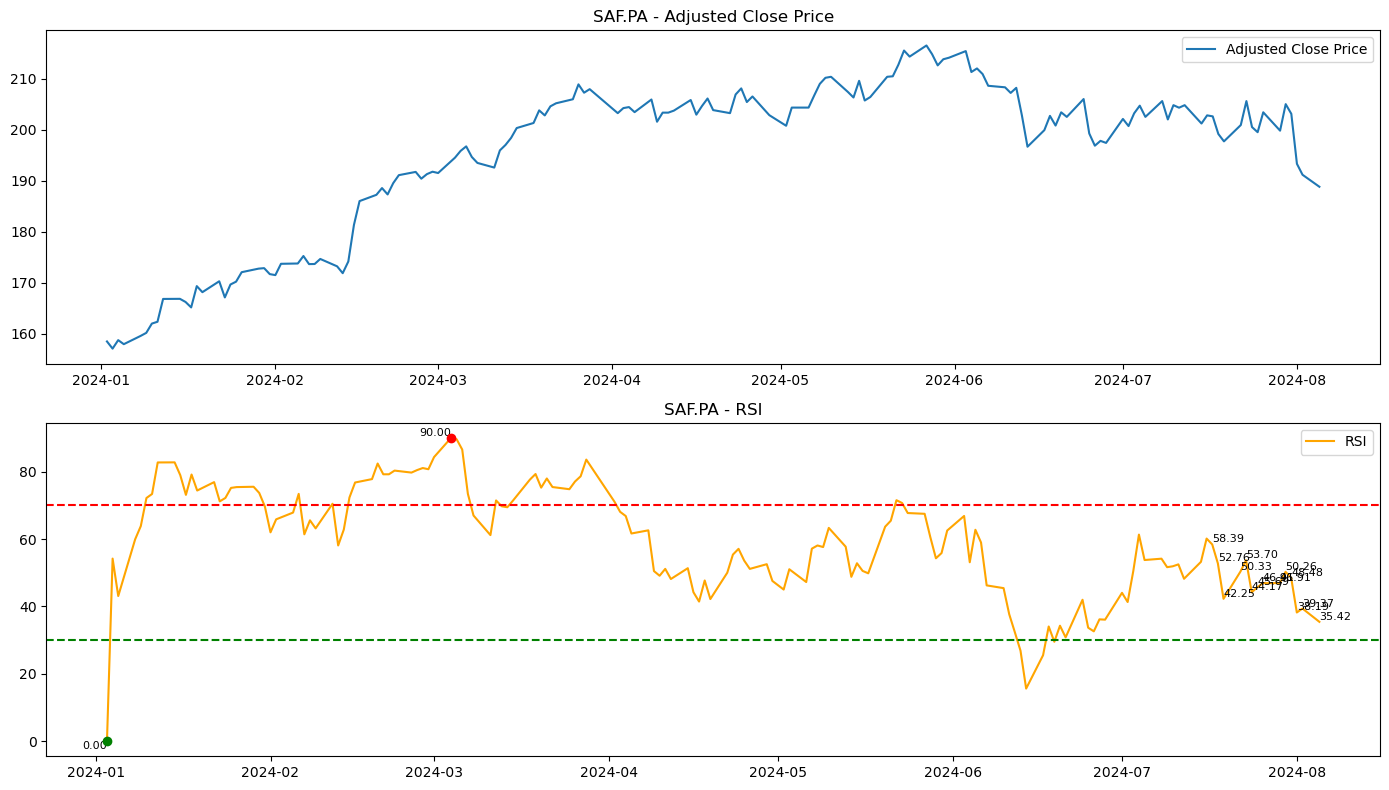

[*********************100%%**********************]  1 of 1 completed


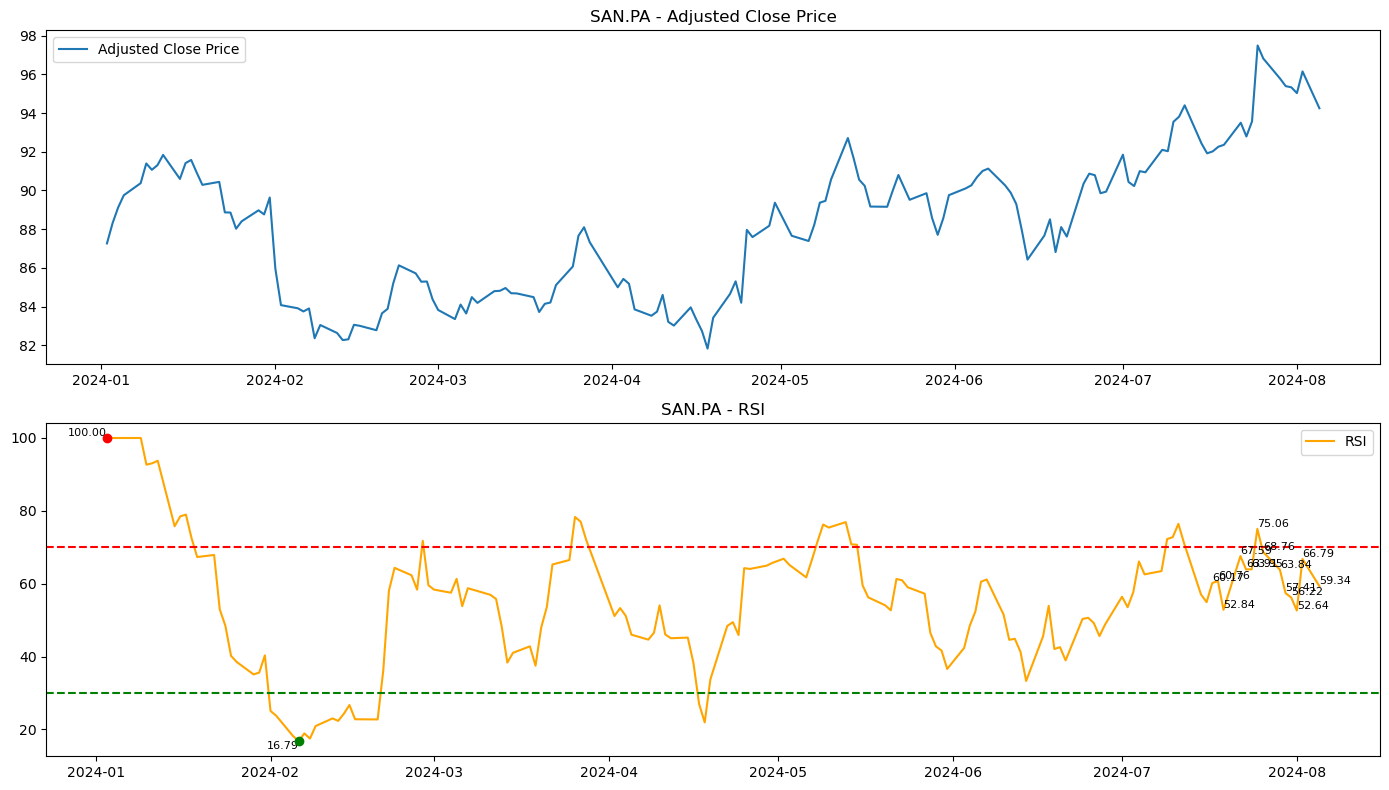

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SNP.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SOLB.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STLA.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STM.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SUEZ.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['SYNN.PA']: YFTzMissingError('$%ticker%: possibly delisted; No

No data found for SNP.PA
No data found for SOLB.PA
No data found for STLA.PA
No data found for STM.PA
No data found for SUEZ.PA
No data found for SYNN.PA
$TEF.PA: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)
No data found for TEF.PA
No data found for THP.PA
$TOTF.PA: possibly delisted; No price data found  (1d 2024-01-01 -> 2024-08-06)
No data found for TOTF.PA


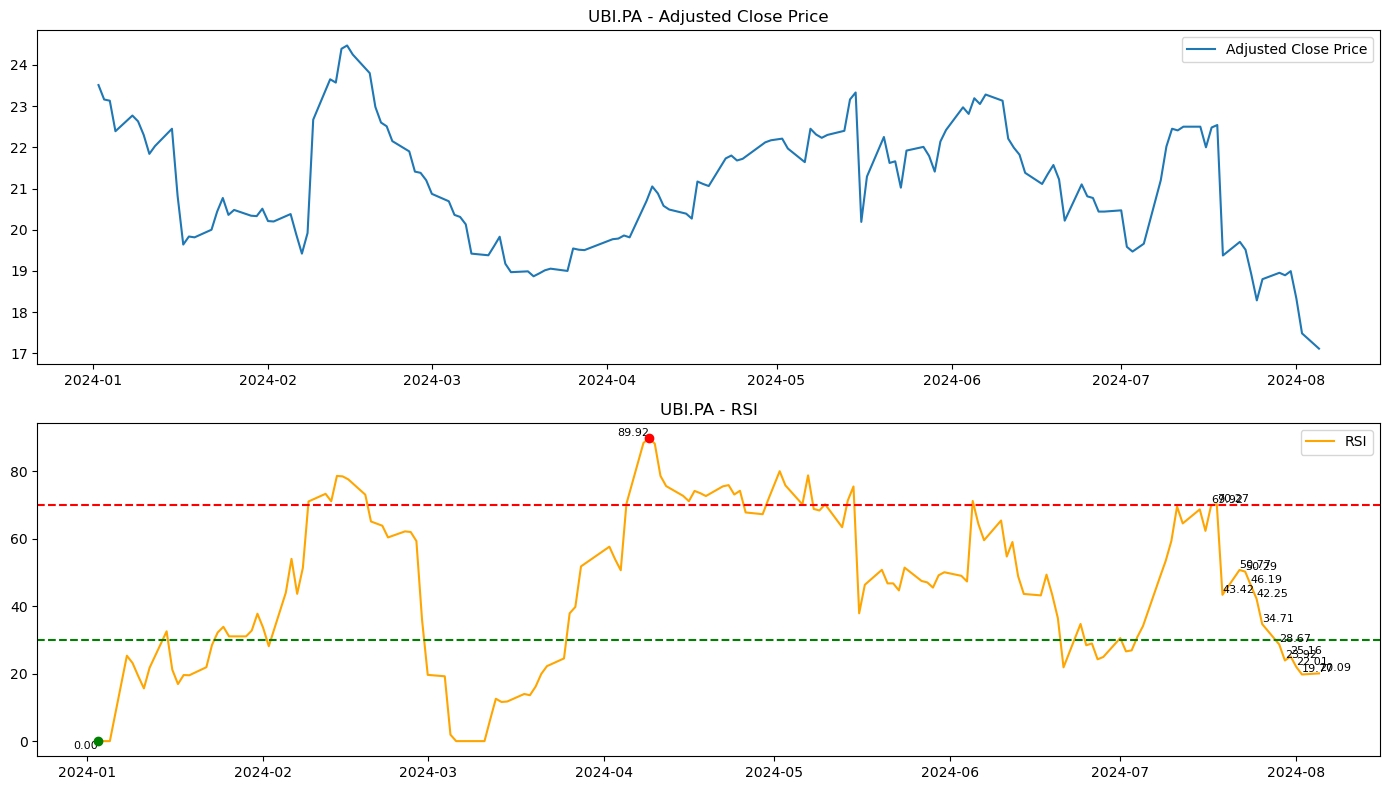

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['UNFP.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['VALEO.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['VEA.PA']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed


No data found for UNFP.PA
No data found for VALEO.PA
No data found for VEA.PA


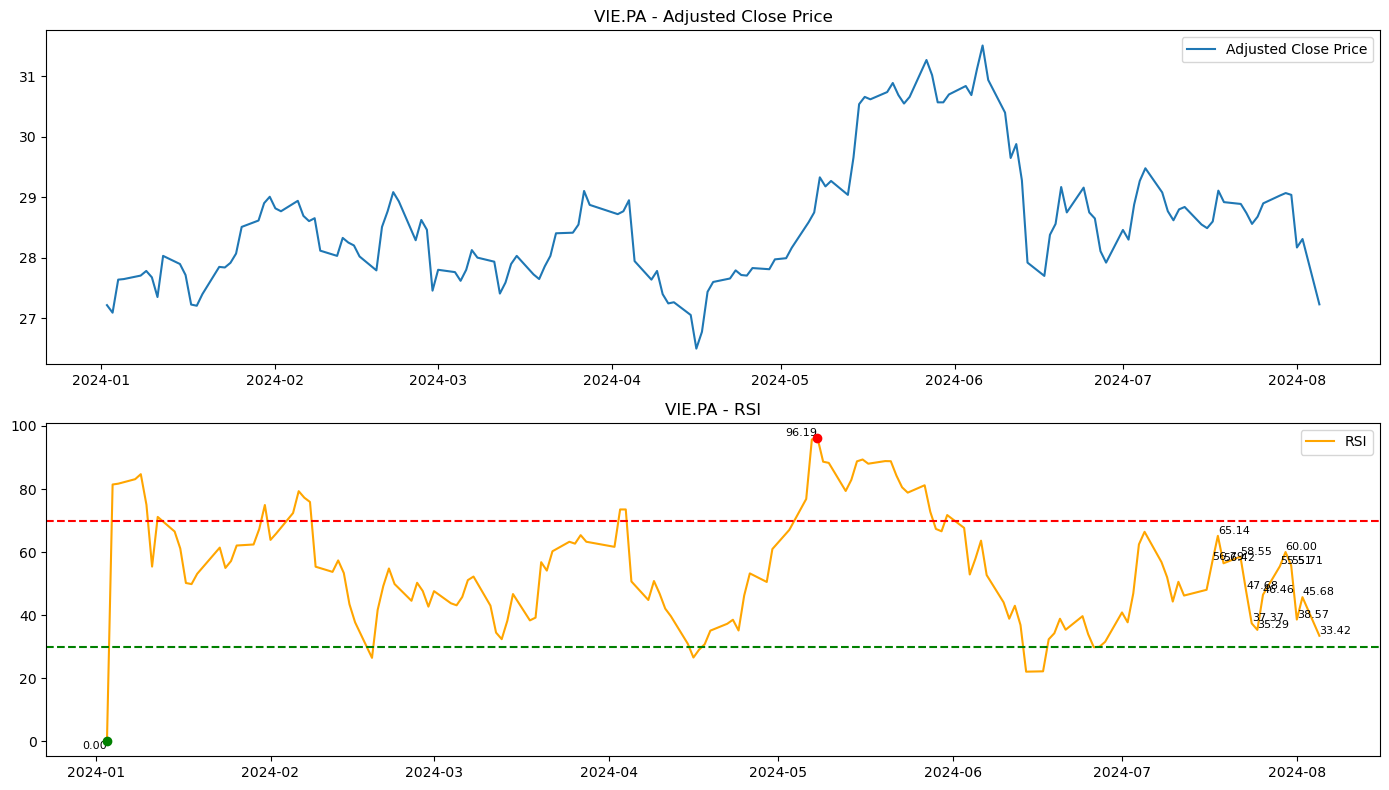

[*********************100%%**********************]  1 of 1 completed


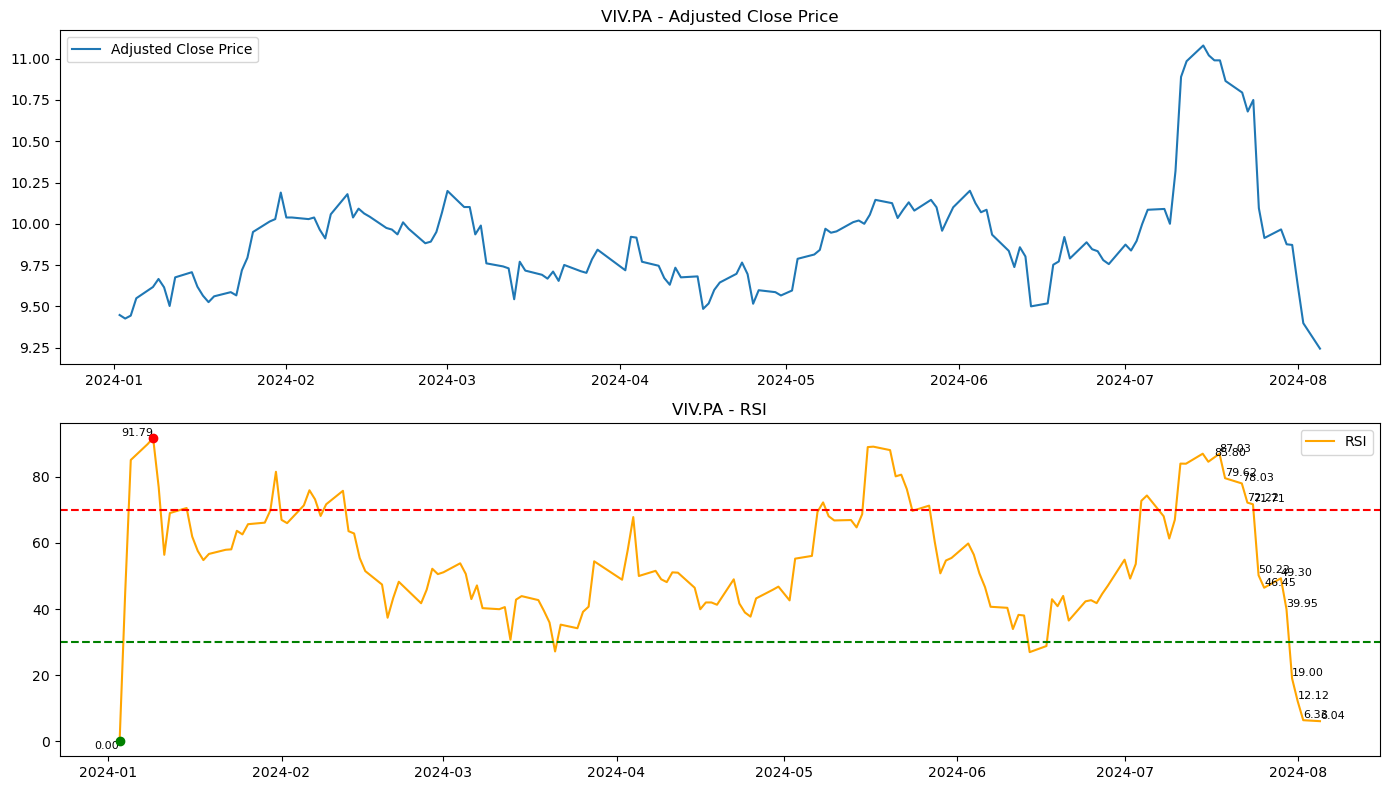

In [19]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CAC40 tickers
cac40_symbols = [
    'ACA.PA', 'AI.PA', 'AIR.PA', 'ALU.PA', 'AM.PA', 'ARFP.PA', 'ATOS.PA', 'AUP.PA',
    'AXA.PA', 'BNP.PA', 'BOUYG.PA', 'CA.PA', 'CAPFP.PA', 'CAR.PA', 'CB.PA', 'CCI.PA',
    'CRON.PA', 'DAN.PA', 'ENGI.PA', 'ESSI.PA', 'EURO.PA', 'FDR.PA', 'GTT.PA', 'KERING.PA',
    'LHN.PA', 'LVMH.PA', 'MMD.PA', 'MNK.PA', 'MS.PA', 'OR.PA', 'POM.PA', 'RENA.PA',
    'RMS.PA', 'SAF.PA', 'SAN.PA', 'SNP.PA', 'SOLB.PA', 'STLA.PA', 'STM.PA', 'SUEZ.PA',
    'SYNN.PA', 'TEF.PA', 'THP.PA', 'TOTF.PA', 'UBI.PA', 'UNFP.PA', 'VALEO.PA', 'VEA.PA',
    'VIE.PA', 'VIV.PA'
]

# Function to calculate RSI
def compute_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window, min_periods=1).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Download data from CAC with yfinance and calculate RSI for each company
for symbol in cac40_symbols:
    try:
        # Fetch historical data
        df = yf.download(symbol, start='2024-01-01', end=pd.Timestamp.now().strftime('%Y-%m-%d'))
        
        # Check if data is empty
        if df.empty:
            print(f"No data found for {symbol}")
            continue
        
        # Calculate RSI
        df['RSI'] = compute_rsi(df['Adj Close'])
        
        # Find the highest and lowest RSI values and their dates
        max_rsi = df['RSI'].max()
        min_rsi = df['RSI'].min()
        max_rsi_date = df['RSI'].idxmax()
        min_rsi_date = df['RSI'].idxmin()

        # Prepare the plot
        plt.figure(figsize=(14, 8))
        
        # Price Plot 
        plt.subplot(2, 1, 1)
        plt.plot(df.index, df['Adj Close'], label='Adjusted Close Price')
        plt.title(f'{symbol} - Adjusted Close Price')
        plt.legend()
        
        # RSI Plot 
        plt.subplot(2, 1, 2)
        plt.plot(df.index, df['RSI'], label='RSI', color='orange')
        plt.axhline(70, color='red', linestyle='--')
        plt.axhline(30, color='green', linestyle='--')
        plt.title(f'{symbol} - RSI')
        plt.legend()
        
        # Annotate the highest and lowest RSI points
        plt.scatter(max_rsi_date, max_rsi, color='red', zorder=5)
        plt.scatter(min_rsi_date, min_rsi, color='green', zorder=5)
        plt.text(max_rsi_date, max_rsi, f'{max_rsi:.2f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')
        plt.text(min_rsi_date, min_rsi, f'{min_rsi:.2f}', fontsize=8, verticalalignment='top', horizontalalignment='right')
        
        # Display RSI values for the last 14 days
        last_14_days_rsi = df['RSI'].tail(14)
        for date, rsi in last_14_days_rsi.items():
            plt.text(date, rsi, f'{rsi:.2f}', fontsize=8, verticalalignment='bottom')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error retrieving or processing data for {symbol}: {e}")